<a href="https://colab.research.google.com/github/GojuRyuProgrammer/Hello/blob/main/NN_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius:10px; padding: 30px; background: linear-gradient(to right, #F99DBC, #FDD9E5); font-size:90%; text-align:left">
<p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:navy;"> E-mail Spam Classification Using Neural Network  </p>

<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;">Student : Rozhin Mohammad-Esmaeili</p>      

<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;"> Supervisor & Tutor: Dr. Nava Eslami </p>

<p style="font-family:newtimeroman; font-size:200%;font-weight:bold;text-align:center;color:navy;"> TA : Mohammad Reza Sheikh </p>
</div>


In [1]:
pip install numpy pandas tensorflow nltk


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['Message'].apply(preprocess_text)
data.head()

,Category,Message,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [6]:
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed_text'])
sequences = tokenizer.texts_to_sequences(data['processed_text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Prepare labels
labels = data['Category'].map({'ham': 0, 'spam': 1}).values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [7]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
56/56 [==============================] - 36s 530ms/step - loss: 0.2640 - accuracy: 0.9077 - val_loss: 0.1278 - val_accuracy: 0.9641
Epoch 2/5
56/56 [==============================] - 23s 410ms/step - loss: 0.0531 - accuracy: 0.9843 - val_loss: 0.0796 - val_accuracy: 0.9787
Epoch 3/5
56/56 [==============================] - 22s 391ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.1033 - val_accuracy: 0.9765
Epoch 4/5
56/56 [==============================] - 23s 419ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0908 - val_accuracy: 0.9798
Epoch 5/5
56/56 [==============================] - 21s 376ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.0948 - val_accuracy: 0.9809


35/35 [==============================] - 1s 35ms/step - loss: 0.0694 - accuracy: 0.9794
Test Accuracy: 0.9793722033500671


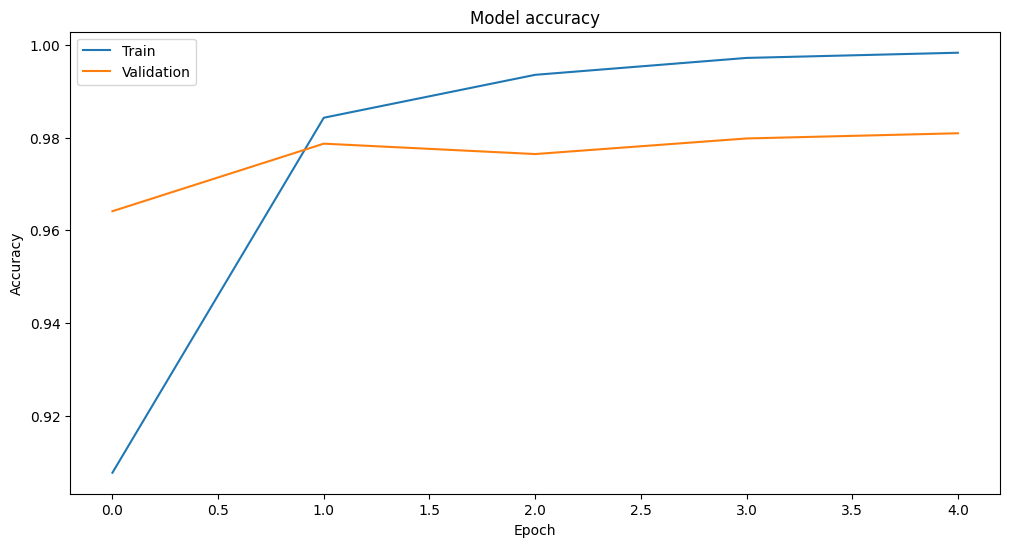

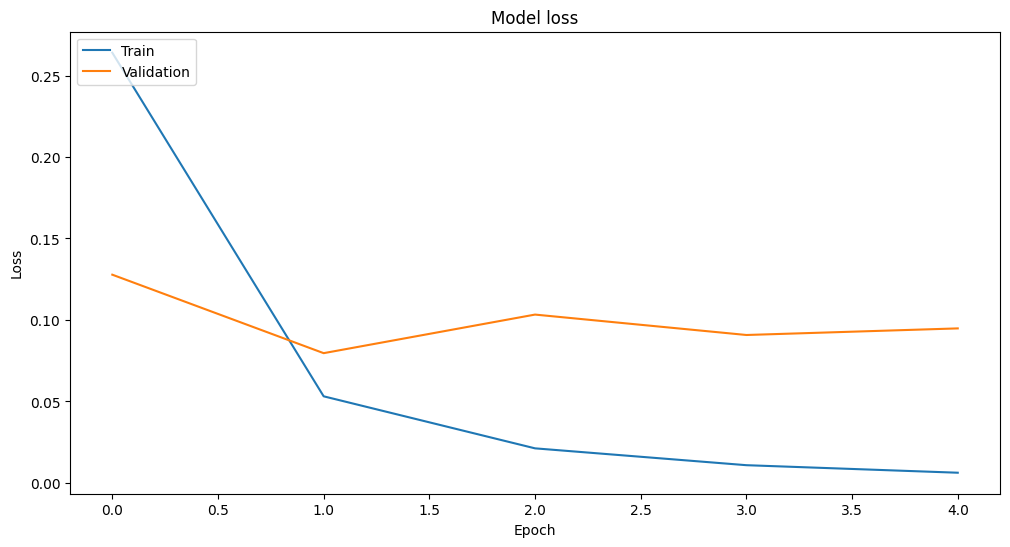

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

35/35 [==============================] - 4s 110ms/step
Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       966
        Spam       0.94      0.90      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



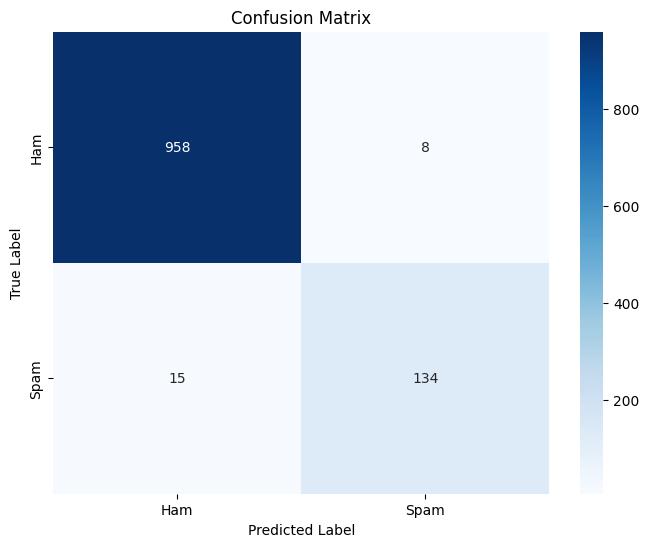

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Compute the classification report
class_report = classification_report(y_test, y_pred_classes, target_names=['Ham', 'Spam'])
print("Classification Report:")
print(class_report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()